<a href="https://colab.research.google.com/github/snigdha2606/Motion-Tracking-project/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FEATURE EXTRACTION

DATASET: Multi-View Stereo (MVS) datasets (face)

This code performs the following tasks:

1. Two images (`myimg1.jpeg` and `myimg2.jpeg`) are loaded using `cv2.imread()` and converted to grayscale using `cv2.cvtColor()`.

2. The Viola-Jones face cascade classifier is created using `cv2.CascadeClassifier()`. This classifier is used to detect faces in the images.

3. The `detectMultiScale()` function is called on both grayscale images to detect faces. The function returns a list of rectangles representing the bounding boxes around the detected faces.

4. Bounding boxes are drawn around the detected faces using `cv2.rectangle()`.

5. The images with the bounding boxes are displayed using `cv2_imshow()`.

6. A SIFT (Scale-Invariant Feature Transform) object is created using `cv2.SIFT_create()`.

7. If faces are detected in both images (i.e., if the `faces1` and `faces2` lists are not empty), the following steps are performed for face recognition and 3D pose estimation:

   a. The region of interest (face) is cropped from each image using the coordinates of the bounding box.

   b. The cropped face images are converted to grayscale.

   c. SIFT keypoints and descriptors are calculated for the face images using `sift.detectAndCompute()`.

   d. Keypoint matching is performed using the Brute-Force Matcher (`cv2.BFMatcher()`). The keypoints from the first image are matched with the keypoints from the second image based on their descriptors.

   e. The matching keypoints are drawn on a new image using `cv2.drawMatches()`.

   f. Keypoint coordinates are converted to numpy arrays.

   g. RANSAC (Random Sample Consensus) algorithm is used to find the best homography between the keypoints of the two images. This is done iteratively, randomly selecting four matched points, calculating the homography, finding inliers, and keeping track of the best homography with the maximum inliers.

   h. The second image is warped using the obtained homography to align it with the first image.

   i. Triangulation is performed to obtain 3D points by using the camera projection matrices, keypoints, and the homography.

   j. The 3D pose (rotation and translation) of the object is estimated using `cv2.solvePnP()`.

   k. The x, y, and z coordinates of the object's position in the camera's coordinate system are printed.

Overall, the code performs face detection, keypoint matching, homography estimation, and 3D pose estimation for a pair of input images containing faces.

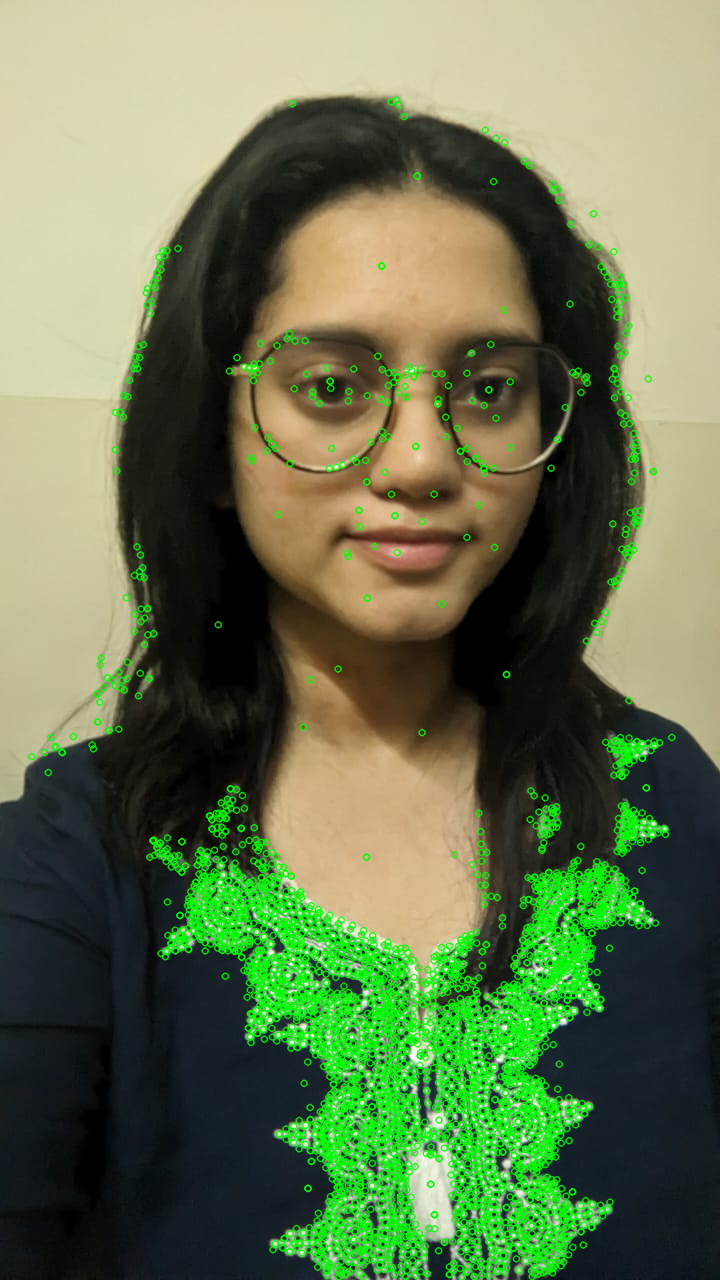

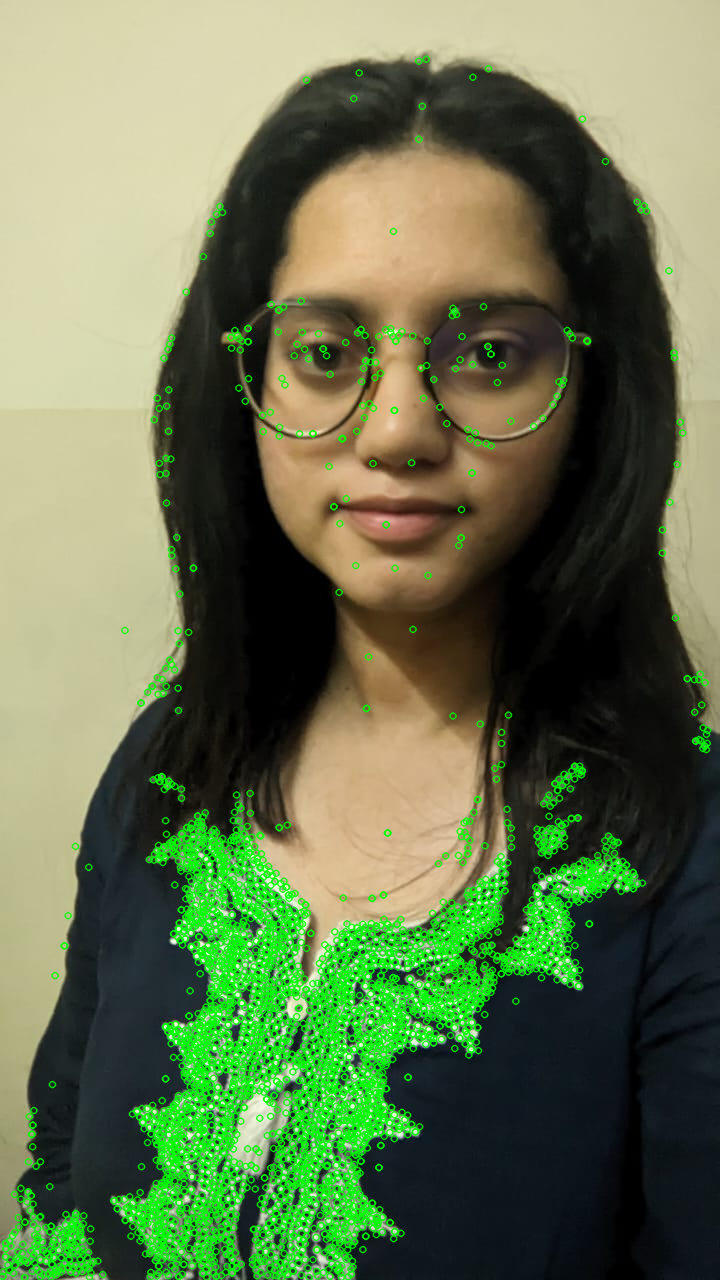

In [43]:
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
img1 = cv2.imread('/content/myimg1.jpeg')
img2 = cv2.imread('/content/myimg2.jpeg')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors for each image
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

# Draw the keypoints on the images
img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0, 255, 0))
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0, 255, 0))

# Show the images with keypoints
cv2_imshow(img1_kp)
cv2_imshow(img2_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

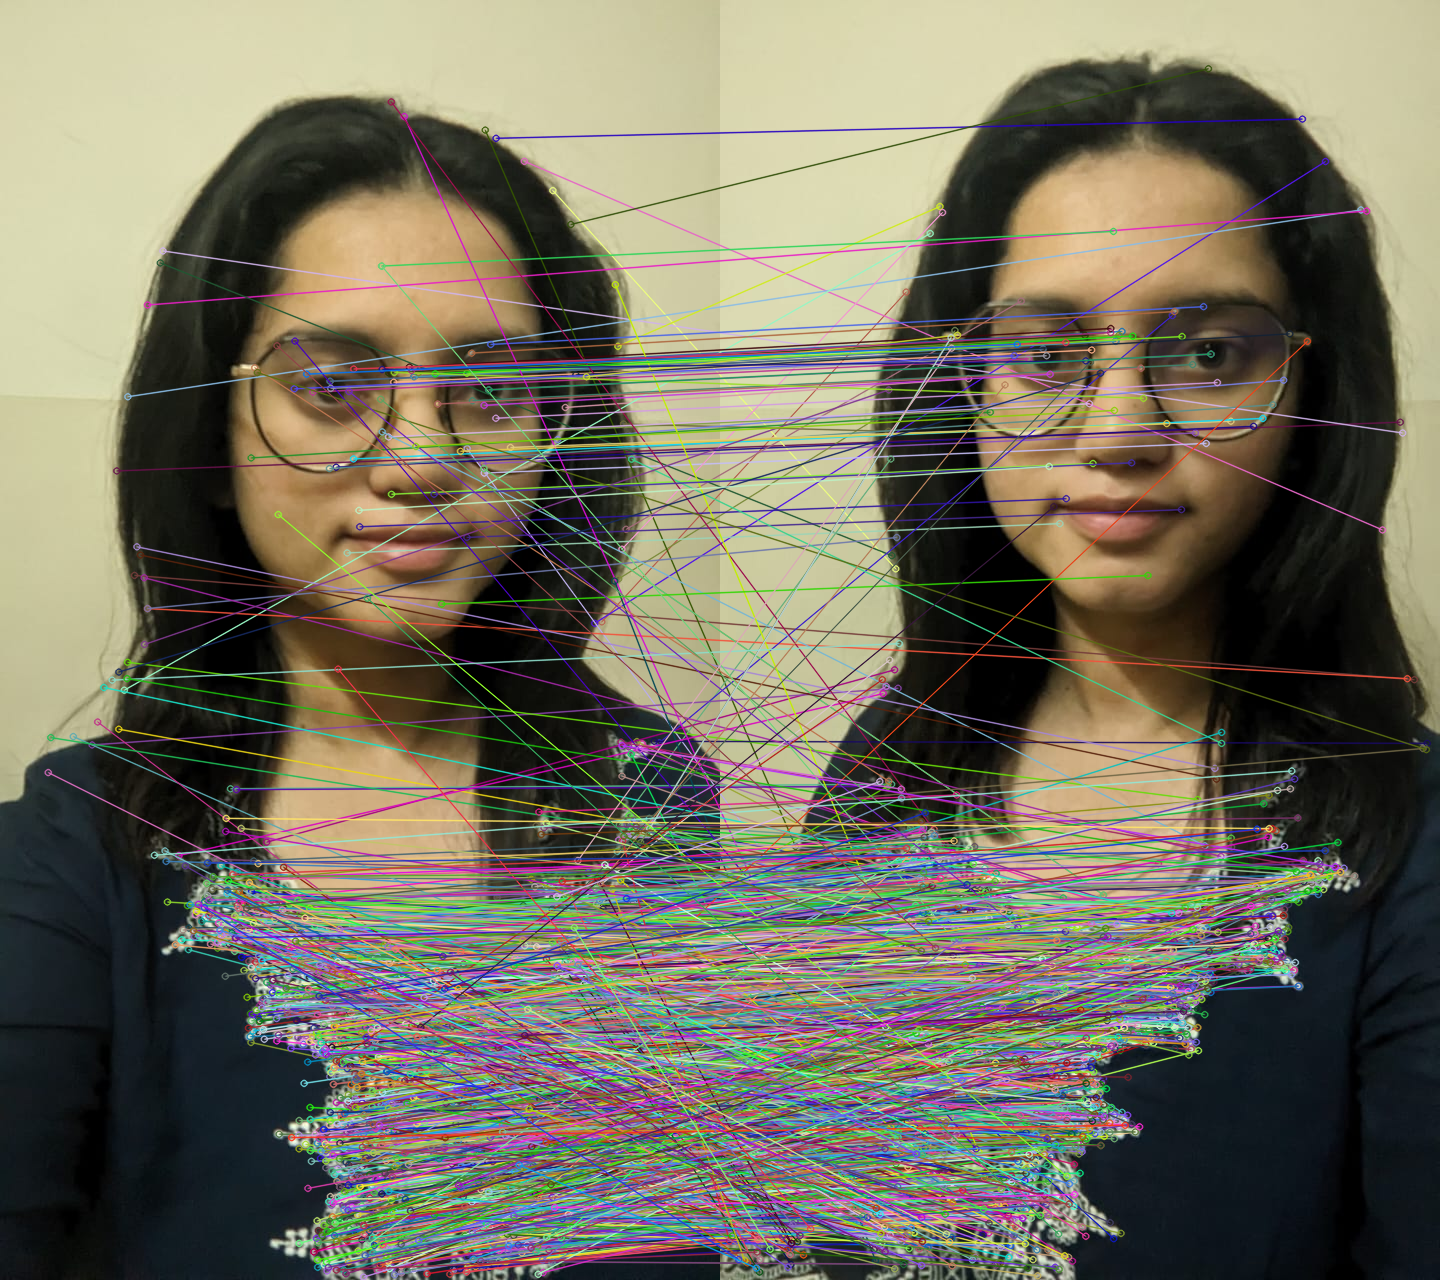

In [48]:
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
img1 = cv2.imread('/content/myimg1.jpeg')
img2 = cv2.imread('/content/myimg2.jpeg')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors for each image
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

#Create a BFMatcher object to match the descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match the descriptors of the two images
matches = bf.match(desc1, desc2)

# Sort the matches by their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
result = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the result
cv2_imshow(result)
# cv2_imshow(img1)
# cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


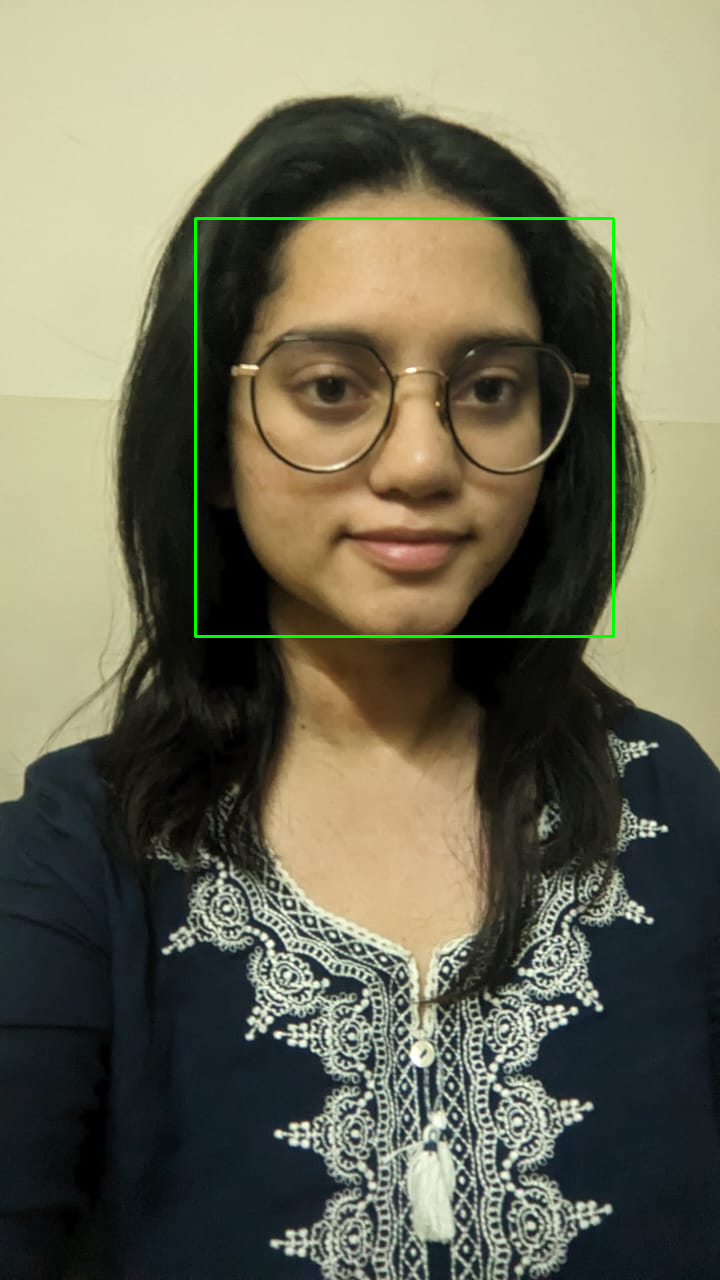

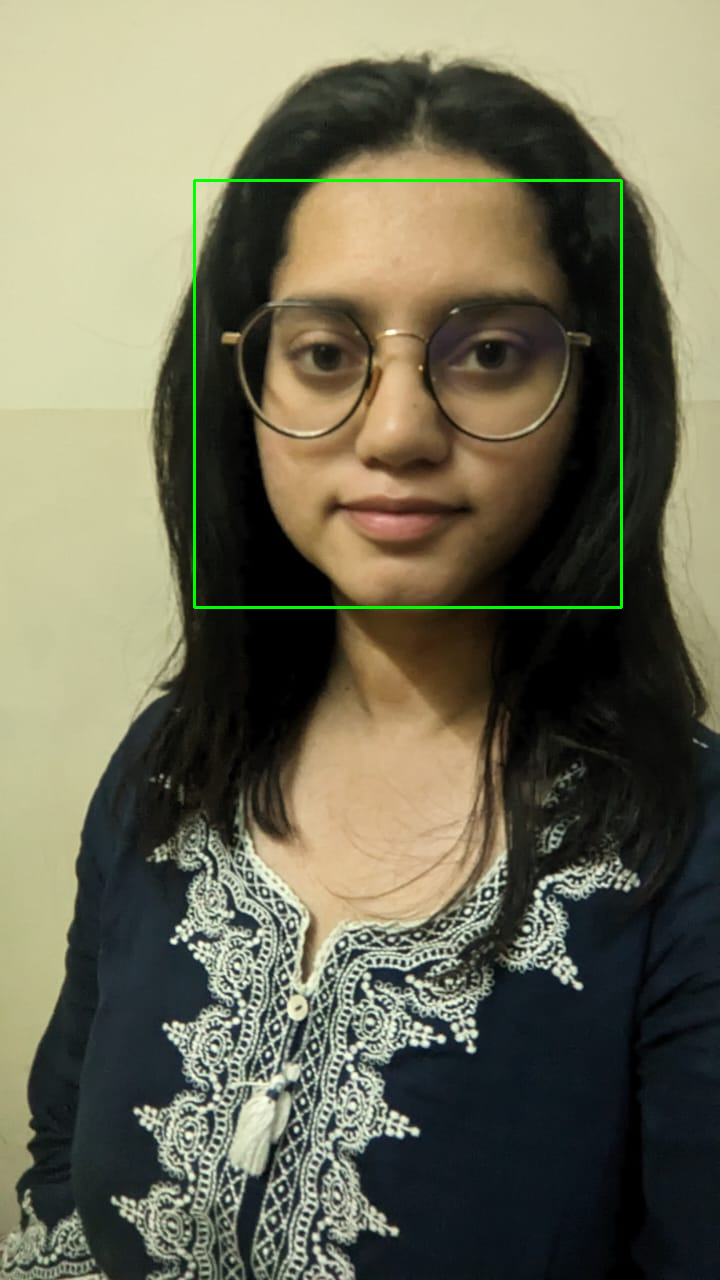

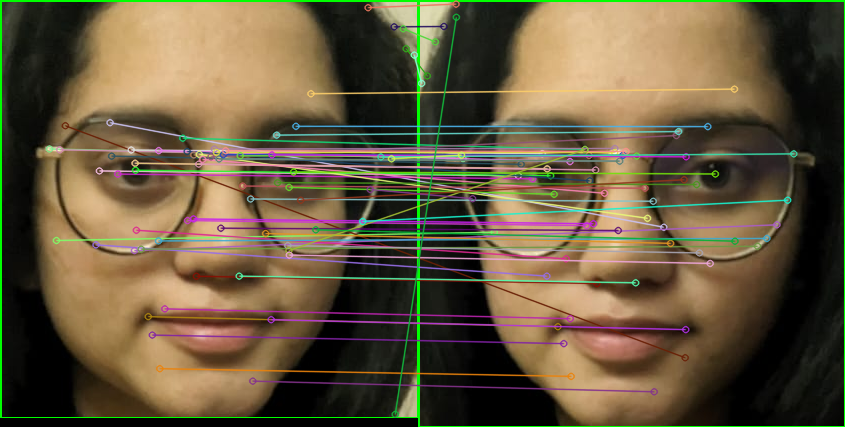

Frame 1
X: [224.22776674]
Y: [188.6124453]
Z: [-1.e-19]

Frame 2
X: [224.22776674]
Y: [188.6124453]
Z: [-1.e-19]



In [49]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the two images and convert them to grayscale
img1 = cv2.imread('/content/myimg1.jpeg')
img2 = cv2.imread('/content/myimg2.jpeg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create the Viola-Jones face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the first image
faces1 = face_cascade.detectMultiScale(gray1, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around the detected faces in the first image
for (x, y, w, h) in faces1:
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Detect faces in the second image
faces2 = face_cascade.detectMultiScale(gray2, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around the detected faces in the second image
for (x, y, w, h) in faces2:
    cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the images with bounding boxes
cv2_imshow(img1)
cv2_imshow(img2)

# Create a SIFT object
sift = cv2.SIFT_create()

# Extract the face regions from the images
if len(faces1) > 0 and len(faces2) > 0:
    # Assuming there is only one face detected in each image
    face1 = faces1[0]
    face2 = faces2[0]

    # Crop the face regions from the images
    face_img1 = img1[face1[1]:face1[1] + face1[3], face1[0]:face1[0] + face1[2]]
    face_img2 = img2[face2[1]:face2[1] + face2[3], face2[0]:face2[0] + face2[2]]

    # Convert face images to grayscale
    gray_face1 = cv2.cvtColor(face_img1, cv2.COLOR_BGR2GRAY)
    gray_face2 = cv2.cvtColor(face_img2, cv2.COLOR_BGR2GRAY)

    # Calculate keypoints and descriptors for the face images
    kp1_face, desc1_face = sift.detectAndCompute(gray_face1, None)
    kp2_face, desc2_face = sift.detectAndCompute(gray_face2, None)

    # Match the keypoints using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches_face = bf.match(desc1_face, desc2_face)

    # Draw the matching keypoints
    matching_result = cv2.drawMatches(
        face_img1, kp1_face, face_img2, kp2_face, matches_face, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Display the matching keypoints
    cv2_imshow(matching_result)

    # Convert keypoints to numpy arrays
    pts1_face = np.float32([kp1_face[m.queryIdx].pt for m in matches_face]).reshape(-1, 1, 2)
    pts2_face = np.float32([kp2_face[m.trainIdx].pt for m in matches_face]).reshape(-1, 1, 2)

    # Number of frames
    num_frames = 2

    # Run RANSAC to find the best homography for each frame
    homographies = []
    num_iterations = 1000  # Set the number of RANSAC iterations
    for frame in range(num_frames):
        max_inliers = 0
        best_homography = None

        for i in range(num_iterations):
            # Randomly select 4 matched points
            random_indices = np.random.randint(0, len(matches_face), size=4)
            src_points = pts1_face[random_indices]
            dst_points = pts2_face[random_indices]

            # Calculate the homography using the 4 points
            homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

            # Find the inliers using the homography
            src_points_transformed = cv2.perspectiveTransform(pts1_face, homography)
            distances = np.sqrt(np.sum((pts2_face - src_points_transformed) ** 2, axis=2))
            inliers = distances < 10

            # Log the number of inliers
            num_inliers = np.sum(inliers)

            # Update the best homography if this iteration produced more inliers
            if num_inliers > max_inliers:
                max_inliers = num_inliers
                best_homography = homography

        homographies.append(best_homography)

    # Warp the second image using the homographies for each frame
    warped_images = []
    for i in range(num_frames):
        homography = homographies[i]
        warped_img = cv2.warpPerspective(face_img2, homography, (face_img1.shape[1], face_img1.shape[0]))
        warped_images.append(warped_img)

    # Triangulation to obtain 3D points
    proj_mat1 = np.eye(3, 4)
    proj_mat2 = np.hstack((np.eye(3), np.zeros((3, 1))))
    points_3d_homogeneous = cv2.triangulatePoints(
        proj_mat1, proj_mat2, pts1_face.reshape(-1, 2).T, pts2_face.reshape(-1, 2).T
    )
    points_3d = cv2.convertPointsFromHomogeneous(points_3d_homogeneous.T).reshape(-1, 3)

    # Estimation of pose for each frame
    poses = []
    for i in range(num_frames):
        _, rvec, tvec = cv2.solvePnP(points_3d, pts1_face.reshape(-1, 2), np.eye(3), np.zeros(5))
        poses.append((rvec, tvec))

    # Display the x, y, and z coordinates of the object
    # They indicate the position of the object in the camera's coordinate system
    for i in range(num_frames):
        rvec, tvec = poses[i]
        print("Frame", i + 1)
        print("X:", tvec[0])
        print("Y:", tvec[1])
        print("Z:", tvec[2])
        print()

cv2.waitKey(0)
cv2.destroyAllWindows()
